# 2. Model with preprocessing

In [9]:
from sklearn.datasets import load_boston


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [11]:
X, y = load_boston(return_X_y=True)


In [12]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
# mod = KNeighborsRegressor()

# Let's start a new pipeline object
# it needs a list of tuples: a name and a step
pipe = Pipeline(
    [
        ("scale", StandardScaler()),
        # After we're done scaling, we'd like to use our nearest neighbor
        ("model", KNeighborsRegressor(n_neighbors=1)), # Let's change default from 5 to 1
    ]
)


In [14]:
# Now this entire pipeline will train and fit itself
pipe.fit(X, y)


Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [15]:
# mod.fit(X, y)


In [16]:
# Now we can use the peipeline that is also scaled
pred = pipe.predict(X)


In [17]:
import matplotlib.pylab as plt


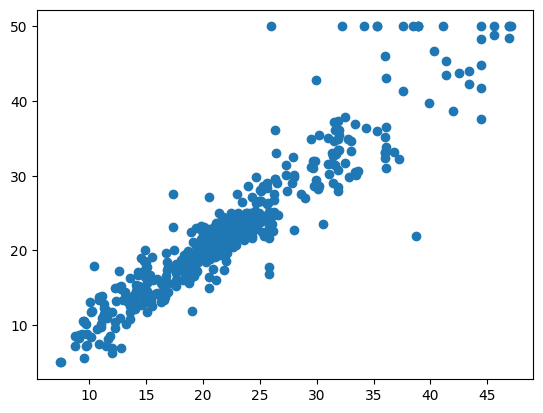

In [18]:
plt.scatter(pred, y)


This plot looks better, but it's misleading: we're evaluating on the same data we trained on. KNeighborsRegressor memorizes training data, so it's cheating by using points it's already seen.

*The nearest neighbor is the original data point itself!*.

For example, with n_neighbors=1, the model just returns the target value of the exact same point. This makes the plot look "perfect", but it says nothing about generalization to new data.

To properly evaluate model performance, we must test on separate data (e.g., using train_test_split).
